# 가설 설정
이혼에 대해 부정적으로 바라보는 시각이 줄어들었으니 이혼율은 감소했을 것이다.

# 분석 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': '한글'}>

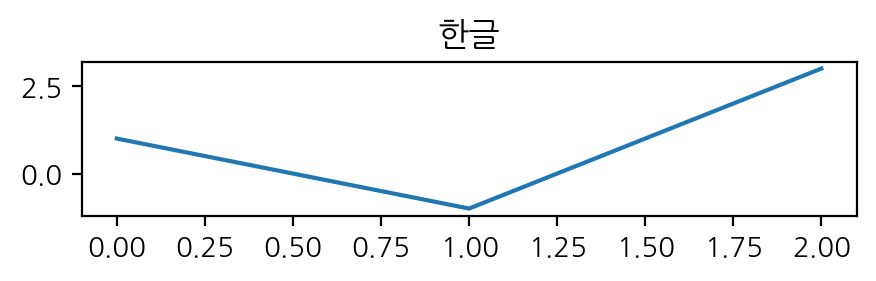

In [3]:
#한글폰트
import koreanize_matplotlib

#retina 디스플레이 설정
%config InlineBackend.figure_format='retina'
pd.Series([1,-1,3]).plot(title='한글',figsize=(5,1))

# 데이터 파일 업로드

In [4]:
df=pd.read_csv('시도_이혼사유별_이혼_20231112162733.csv',encoding='CP949')
df.head()

,시도별,항목,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전국,계,116535,123999,116858,114284,114316,115292,115510,109153,107328,106032
1,전국,배우자 부정,9430,10351,10001,9228,8616,8702,8573,8016,7564,7528
2,전국,"정신적,육체적 학대",5882,6246,5559,5328,4759,4784,4545,4172,3812,3837
3,전국,가족간 불화,8977,9159,8564,8072,7381,7961,7967,8017,7927,7523
4,전국,경제문제,16565,17871,14017,14031,14472,14519,13060,12126,10928,10742


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     171 non-null    object
 1   항목      171 non-null    object
 2   2008    171 non-null    object
 3   2009    171 non-null    object
 4   2010    171 non-null    object
 5   2011    171 non-null    object
 6   2012    171 non-null    int64 
 7   2013    171 non-null    int64 
 8   2014    171 non-null    int64 
 9   2015    171 non-null    int64 
 10  2016    171 non-null    int64 
 11  2017    171 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 16.2+ KB


In [6]:
df=df.melt(id_vars=df.columns[:2],var_name='발생 연도',value_name='발생 건수') #melt를 이용해 발생연도, 발생 건수 컬럼 생성하기
df.head()

,시도별,항목,발생 연도,발생 건수
0,전국,계,2008,116535
1,전국,배우자 부정,2008,9430
2,전국,"정신적,육체적 학대",2008,5882
3,전국,가족간 불화,2008,8977
4,전국,경제문제,2008,16565


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     1710 non-null   object
 1   항목      1710 non-null   object
 2   발생 연도   1710 non-null   object
 3   발생 건수   1710 non-null   object
dtypes: object(4)
memory usage: 53.6+ KB


In [8]:
df=df.rename(columns={'시도별':'지역','항목':'이혼 사유'})
df.dtypes

지역       object
이혼 사유    object
발생 연도    object
발생 건수    object
dtype: object

In [9]:


df['발생 건수']=df['발생 건수'].replace('-','0',regex=True)
df['발생 건수'].isnull().sum()
df['발생 건수']=df['발생 건수'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      1710 non-null   object
 1   이혼 사유   1710 non-null   object
 2   발생 연도   1710 non-null   object
 3   발생 건수   1710 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 53.6+ KB


In [10]:
df['발생 연도']=df['발생 연도'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      1710 non-null   object
 1   이혼 사유   1710 non-null   object
 2   발생 연도   1710 non-null   int64 
 3   발생 건수   1710 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 53.6+ KB


In [11]:
df

,지역,이혼 사유,발생 연도,발생 건수
0,전국,계,2008,116535
1,전국,배우자 부정,2008,9430
2,전국,"정신적,육체적 학대",2008,5882
3,전국,가족간 불화,2008,8977
4,전국,경제문제,2008,16565
...,...,...,...,...
1705,국외,경제문제,2017,89
1706,국외,성격차이,2017,581
1707,국외,건강문제,2017,18
1708,국외,기타,2017,622


# 시각화

In [12]:
df.groupby('지역')['발생 건수'].sum() #지역별 발생 건수 합계

지역
강원도          70822
경기도         563704
경상남도        147904
경상북도        108622
광주광역시        58044
국외           62252
대구광역시        95856
대전광역시        61662
부산광역시       148132
서울특별시       404880
세종특별자치시       3750
울산광역시        50414
인천광역시       145330
전국         2278614
전라남도         82046
전라북도         79356
제주특별자치도      28986
충청남도         95772
충청북도         71082
Name: 발생 건수, dtype: int64

<Axes: xlabel='지역'>

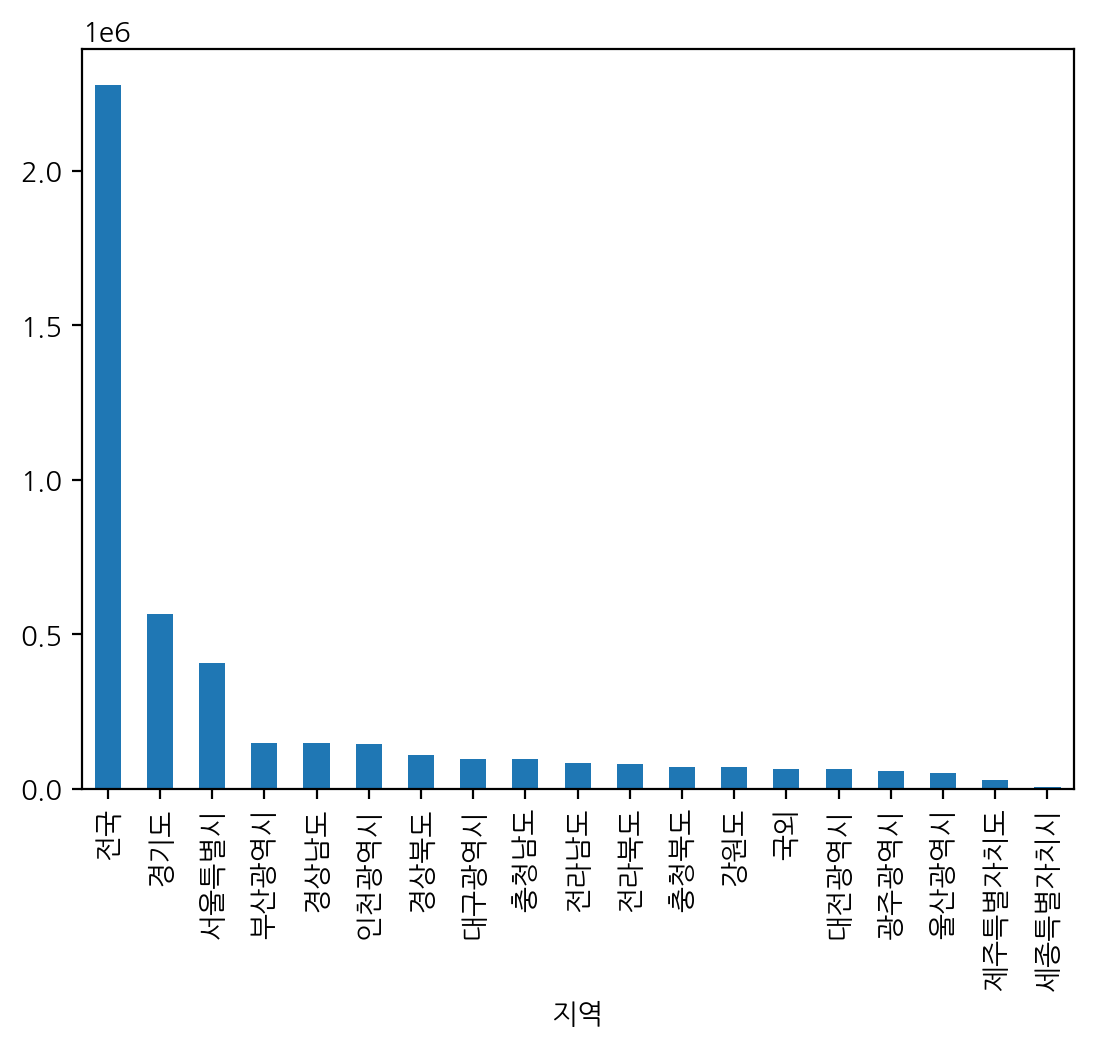

In [13]:
df.groupby('지역')['발생 건수'].sum().sort_values(ascending=False).plot(kind='bar') #지역별 발생 건수 합계 시각화

#전국 데이터가 너무 커서 다른 지역은 확인이 불가함.

<Axes: xlabel='지역'>

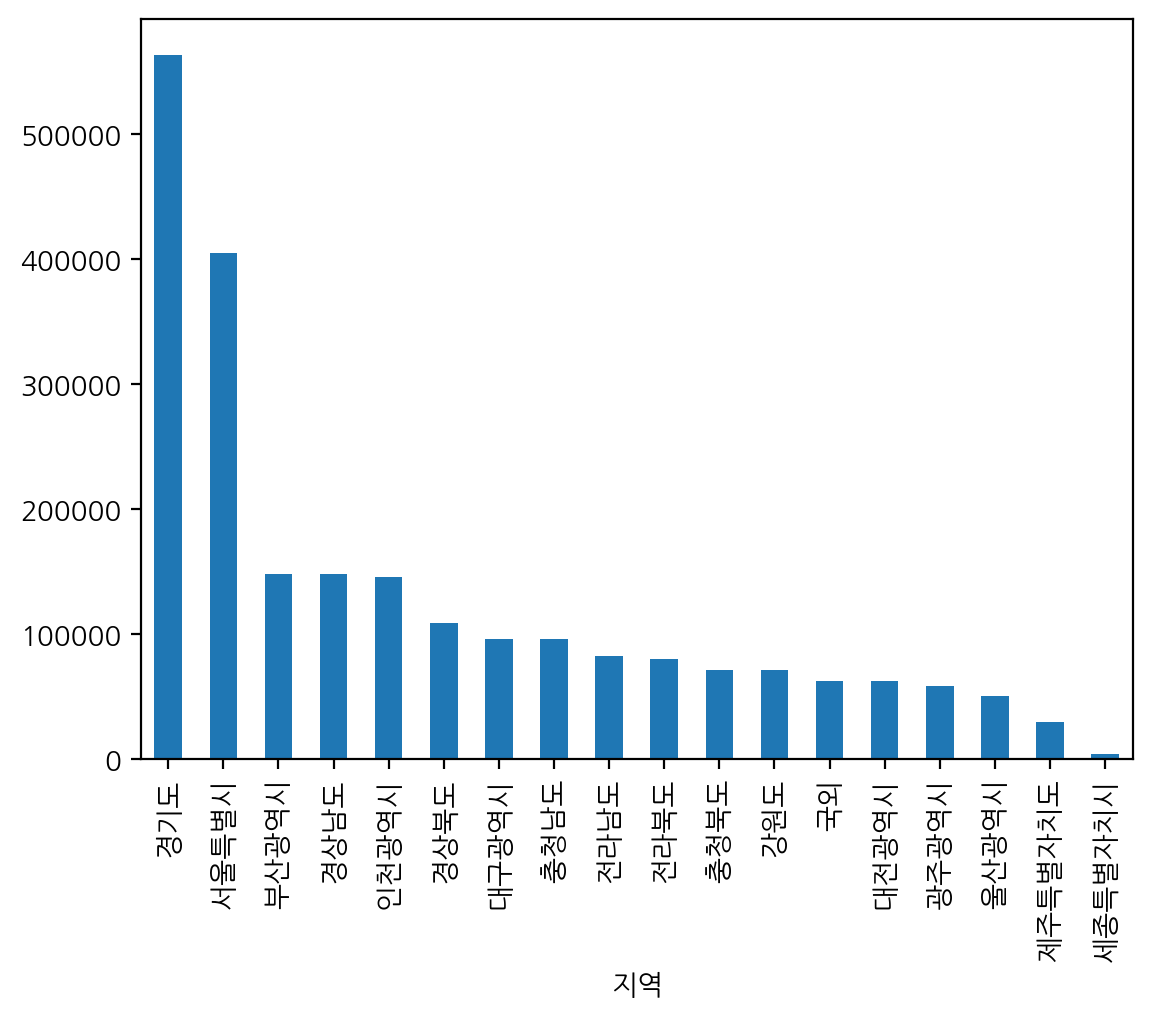

In [14]:
ndf=df.drop(index=df.loc[df['지역']=='전국'].index) 
ndf=ndf.reset_index() #인덱스 설정을 리셋하기 (0부터 다시 시작) / 전국 데이터가 존재할 때는 9번부터 시작했음
ndf.groupby('지역')['발생 건수'].sum().sort_values(ascending=False).plot(kind='bar') 
#전국 데이터를 제외하고 다시 시각화

# 가설 검증

In [15]:
#발생 건수가 가장 큰 이혼에 대한 데이터

In [16]:
ndf.loc[ndf['발생 건수']==ndf['발생 건수'].max()]

,index,지역,이혼 사유,발생 연도,발생 건수
234,252,경기도,계,2009,29807


In [17]:
personality=ndf.loc[ndf['이혼 사유']=='성격차이']
personality.sort_values(by='발생 건수',ascending=False)

,index,지역,이혼 사유,발생 연도,발생 건수
239,257,경기도,성격차이,2009,14344
77,86,경기도,성격차이,2008,13703
1049,1112,경기도,성격차이,2014,13102
725,770,경기도,성격차이,2012,13099
887,941,경기도,성격차이,2013,13067
...,...,...,...,...,...
716,761,세종특별자치시,성격차이,2012,113
68,77,세종특별자치시,성격차이,2008,0
554,590,세종특별자치시,성격차이,2011,0
392,419,세종특별자치시,성격차이,2010,0


<Axes: title={'center': '연도별 이혼 사유'}, xlabel='발생 연도'>

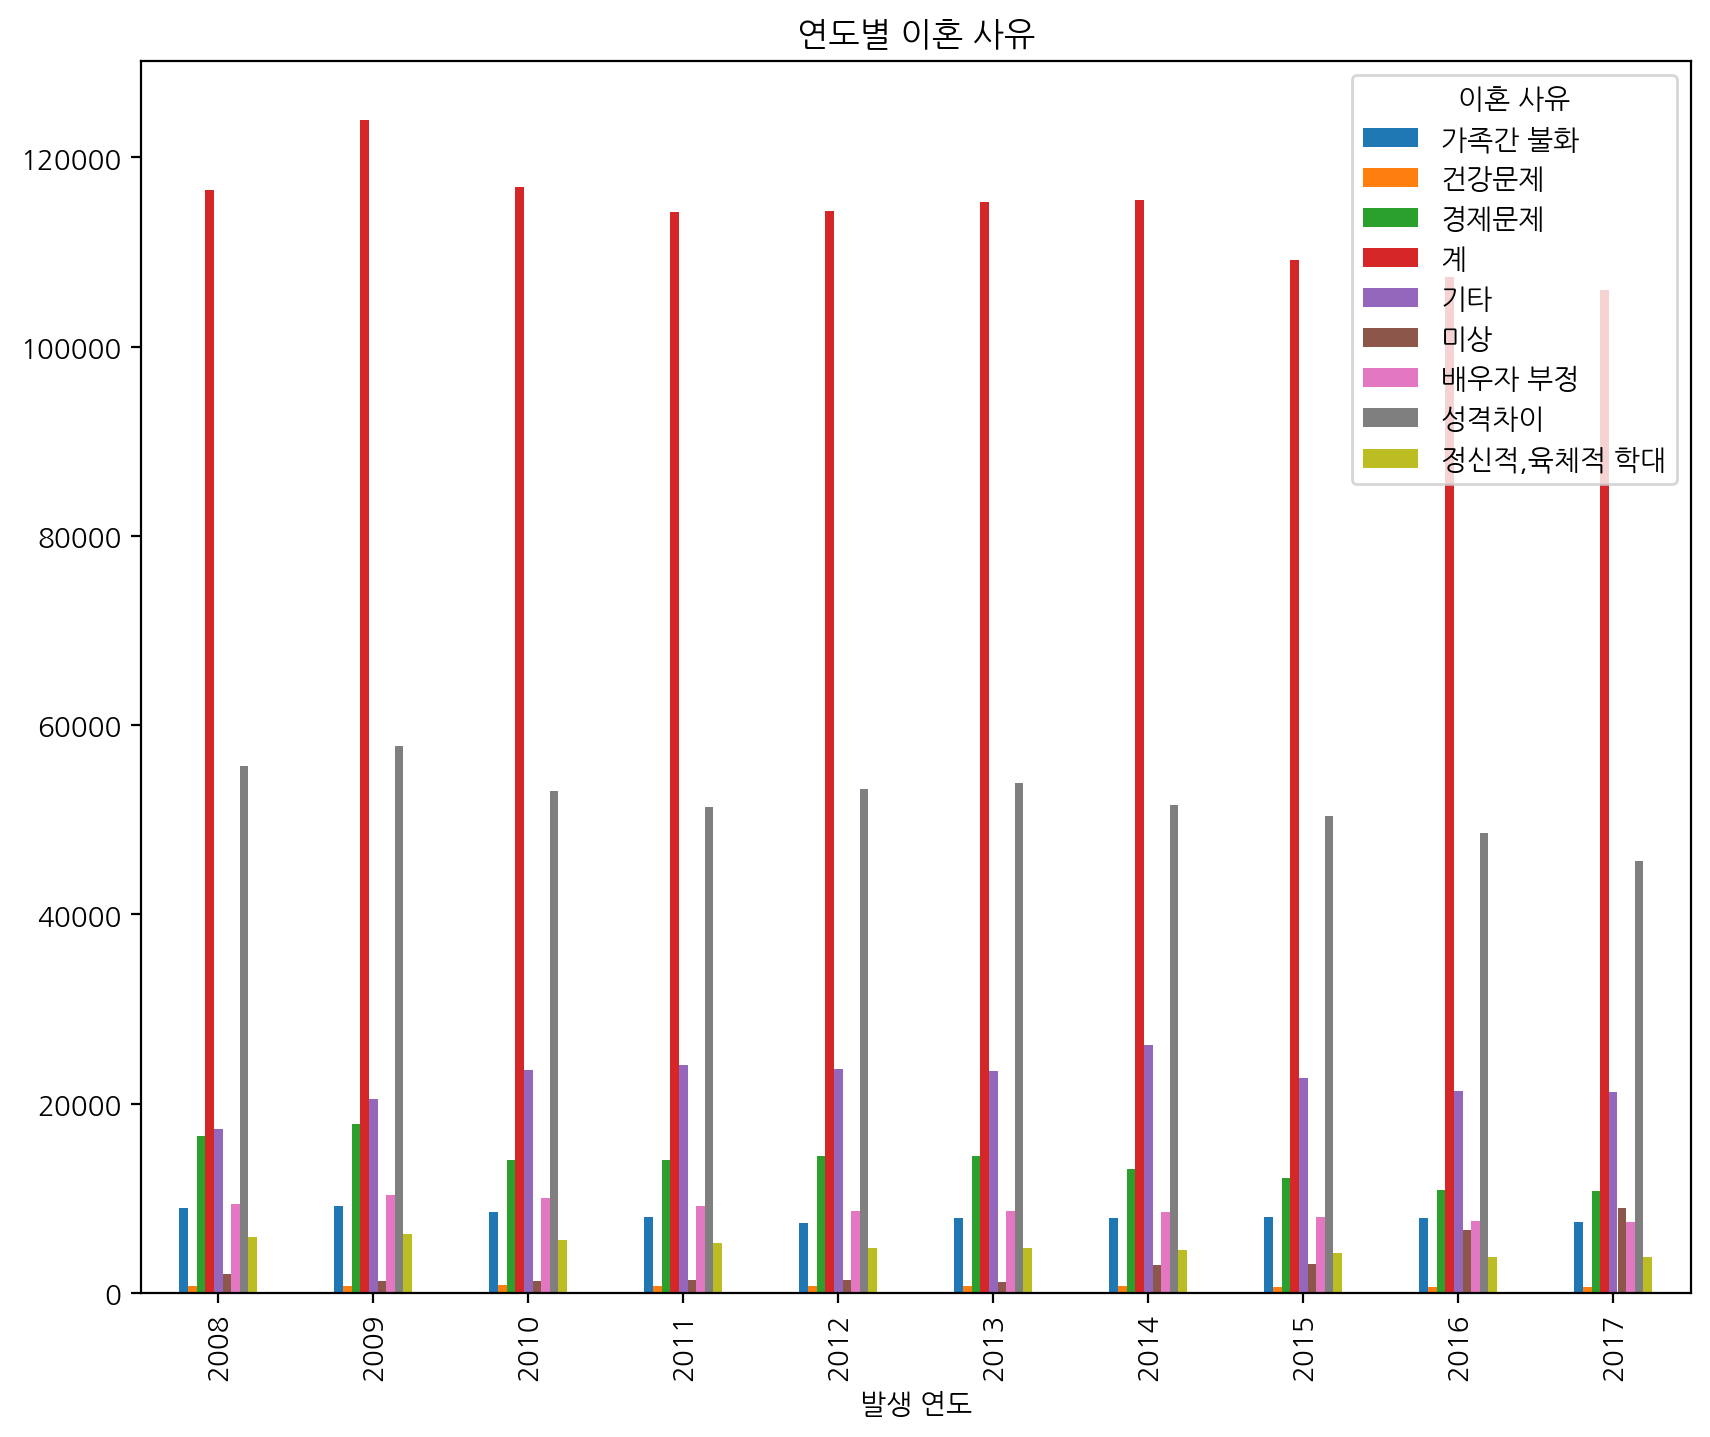

In [18]:
#연도별 이혼 사유
ndf.pivot_table(index='발생 연도',columns='이혼 사유',
               values='발생 건수',aggfunc='sum').plot.bar(figsize=(10,8),
                                                      title='연도별 이혼 사유')

<Axes: title={'center': '지역별 이혼 사유'}, xlabel='지역'>

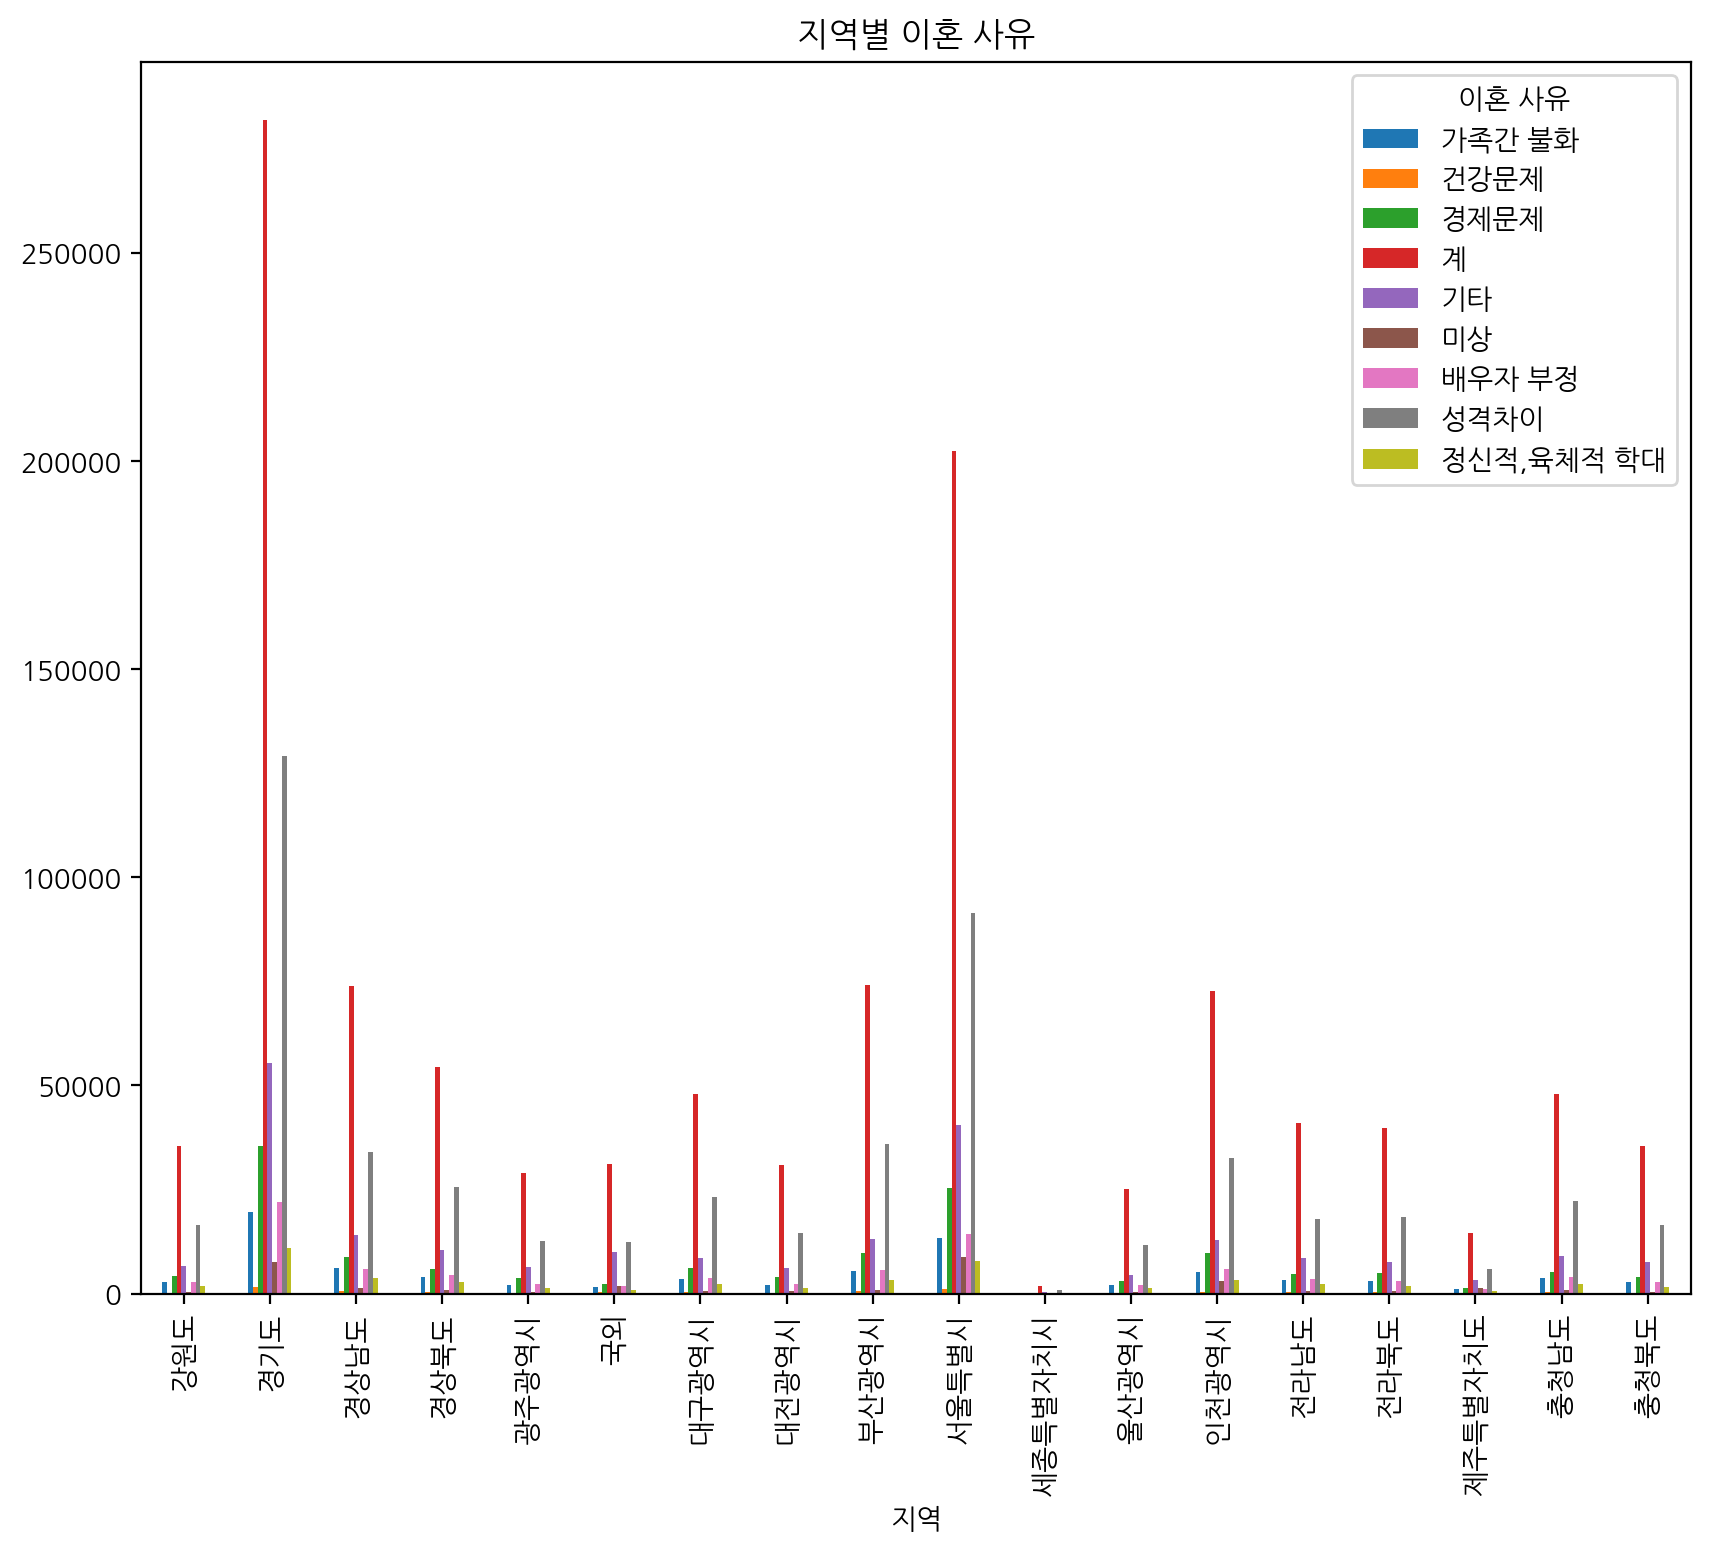

In [19]:
#지역별 이혼 사유
ndf.pivot_table(index='지역',columns='이혼 사유',
               values='발생 건수',aggfunc='sum').plot.bar(figsize=(10,8),
                                                      title='지역별 이혼 사유')

# 결론
- 연도가 지날수록 이혼율이 증가한다는 가설은 틀렸다.
 
- 이혼 사유 중 성격차이가 가장 높은 비중을 차지했다.